In [1]:
import torch
import torch.nn as nn

In [38]:
def double_conv(no_in, no_out):
    conv = nn.Sequential(nn.Conv2d(kernel_size=3), nn.ReLU(inplace=True),
                        nn.Conv2d(kernel_size=3), nn.ReLU(inplace=True))
    return conv

def crop_image(tensor, target_tensor):
    target_size = target_tensor.size()[2]
    tensor_size = tensor.size()[2]
    delta = tensor_size - target_size
    delta = delta // 2
    return tensor[:, :, delta:tensor_size-delta, delta:tensor_size-delta]
    
    
    
class UNet(nn.Module):
    def __init__(self):
        super(self, UNet).__init__()
        self.max_poool_2x2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv_1 = double_conv(1, 64)
        self.conv_2 = double_conv(64, 128)
        self.conv_3 = double_conv(128, 256)
        self.conv_4 = double_conv(256, 512)
        self.conv_5 = double_conv(512, 1025)
        
        self.up_trans_1 = nn.ConvTranspose2d(
            in_channels=1024, out_channels=512,
            kernel_size=2, stride=2)

        self.up_conv_1 = double_conv(1024, 512)
        
        self.up_trans_2 = nn.ConvTranspose2d(
            in_channels=512, out_channels=256,
            kernel_size=2, stride=2)

        self.up_conv_2 = double_conv(512, 256)
        
        self.up_trans_3 = nn.ConvTranspose2d(
            in_channels=256, out_channels=128,
            kernel_size=2, stride=2)

        self.up_conv_3 = double_conv(256, 128)
        
        self.up_trans_4 = nn.ConvTranspose2d(
            in_channels=1024, out_channels=512,
            kernel_size=2, stride=2)

        self.up_conv_4 = double_conv(128, 64)
        
        self.out = nn.Conv2d(
        in_channels=64,
        out_channels=2,
        kernel_size=1)        

        
        
    def forward(self, image):
        x1 = self.conv_1(image)
        x2 = self.max_poool_2x2(x1)
        x3 = self.conv_2(x2)
        x4 = self.max_poool_2x2(x3)
        x5 = self.conv_3(x4)
        x6 = self.max_poool_2x2(x5)
        x7 = self.conv_4(x6)
        x8 = self.max_poool_2x2(x7)
        x9 = self.conv_5(x8)
        x = self.up_trans_1(x9)
        y = crop_img(x7, x)
        x = self.up_conv_1(torch.cat([x, y], 1))
        x = self.up_trans_2(x)
        y = crop_img(x5, x)
        x = self.up_conv_2(torch.cat([x, y], 1))
        x = self.up_trans_3(x)
        y = crop_img(x3, x)
        x = self.up_conv_3(torch.cat([x, y], 1))
        x = self.up_trans_4(x)
        y = crop_img(x1, x)
        x = self.up_conv_4(torch.cat([x, y], 1))
        x = self.out(x)
        print(x.size())
        return x


        
        
if __name__ == "__main__":
    image = torch.rand((1, 1, 572, 572))
    model = UNet()
    print(model.foward(image))


        
        
        
        

In [85]:
random_tensor = torch.randint(0, 10, size=(3,3,5, 4))

In [86]:
another_tensor = torch.randint(0, 10, size=(3,3,7, 2))

In [110]:
a = torch.randint(0, 10, size=(3,3,5, 4))
b = torch.randint(0, 10, size=(3,3,5, 4))
torch.cat([a,b], 2).size()

torch.Size([3, 3, 10, 4])

In [87]:
crop_image(random_tensor, another_tensor)

tensor([[[[3]],

         [[6]],

         [[0]]],


        [[[6]],

         [[6]],

         [[4]]],


        [[[5]],

         [[0]],

         [[8]]]])

In [88]:
target_size = random_tensor.size()[2]
tensor_size = another_tensor.size()[2]
delta = tensor_size - target_size
delta = delta // 2


In [89]:
target_size = random_tensor.size()[2]
tensor_size = another_tensor.size()[2]


In [90]:
target_size

5

In [93]:
tensor_size

7

In [91]:
delta

1

In [94]:
tensor_size - delta

6

In [112]:
2*torch.ones(10, 2)

tensor([[2., 2.],
        [2., 2.],
        [2., 2.],
        [2., 2.],
        [2., 2.],
        [2., 2.],
        [2., 2.],
        [2., 2.],
        [2., 2.],
        [2., 2.]])

In [137]:
class LR(nn.Module):
    
    def __init__(self, ins, out):
        super(LR, self).__init__()
        self.linear = nn.Linear(ins, out)
    def forward(self, x):
        out = self.linear(x)
        return out

In [138]:
a = LR(1, 1)

In [144]:
print(list(a.parameters()))

[Parameter containing:
tensor([[0.2238]], requires_grad=True), Parameter containing:
tensor([0.1499], requires_grad=True)]


In [140]:
X = torch.tensor([[1.0], [2.0], [3.0]])

In [141]:
a(X)

tensor([[0.3738],
        [0.5976],
        [0.8214]], grad_fn=<AddmmBackward>)

In [143]:
a.state_dict()

OrderedDict([('linear.weight', tensor([[0.2238]])),
             ('linear.bias', tensor([0.1499]))])

In [167]:
from torch.utils.data import Dataset

class Data(Dataset):
    
    def __init__(self):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.y = -3*self.x+1
        self.len = self.x.shape[0]
        
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.len


In [200]:
dataset = Data()

In [201]:
len(d)

60

In [202]:
from torch.utils.data import DataLoader

trainloader = DataLoader(dataset=dataset, batch_size=1)

In [207]:
def forward(x):
    y = w*x+b
    return y

def criterion(yhat, y):
    return torch.mean((yhat-y)**2)

lr=0.1
total = 0
for x,y in trainloader:
    yhat = forward(x)
    loss = criterion(yhat, y)
    loss.backward()
    w.data += -lr*w.grad.data
    b.data += -lr*b.grad.data
    w.grad.data.zero_()
    b.grad.data.zero_()
    total+=loss.item()
total


1.3523266062520634e-08

In [174]:
w = torch.tensor(-15.0, requires_grad=True)
b = torch.tensor(-10.0, requires_grad=True)
X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = -3*X

In [195]:
class LR(nn.Module):
    
    def __init__(self):
        super(LR, self).__init__()
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.y = -3*self.x+1
        self.len = self.x.shape[0]
        self.lr = 0.1
        w = torch.tensor(-15.0, requires_grad=True)
        b = torch.tensor(-10.0, requires_grad=True)


    def forward(self, x):
        y = w*x+b
        return y
    
    def criterion(self, yhat, y):
        return torch.mean((yhat-y)**2)
    
    def run(self):
        cost = []
        for epoch in range(4):
            total = 0
            for x,y in zip(self.x, self.y):
                yhat = self.forward(x)
                loss = self.criterion(yhat, y)
                loss.backward()
                w.data += -self.lr*w.grad.data
                b.data += -self.lr*b.grad.data
                w.grad.data.zero_()
                b.grad.data.zero_()
                total+=loss.item()
            cost.append(total)
        return w, b, loss, cost
                

In [196]:
r = LR()

In [197]:
t = r.run()

In [199]:
t

(tensor(-3.0000, requires_grad=True),
 tensor(0.9999, requires_grad=True),
 tensor(2.0464e-12, grad_fn=<MeanBackward0>),
 [1.5413114724083243e-05,
  3.680006301465255e-06,
  8.680590397602828e-07,
  2.1117804394066297e-07])

In [217]:
from torch.functional import F
class abc(nn.Module):
    
    def __init__(self):
        super(abc, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=4, out_channels=128, kernel_size=(3,3), padding=(1,1))
        self.maxpool1 = nn.MaxPool2d(kernel_size=(2,2))
    
    def forward(self, images, targets=None):
        x = F.relu(self.conv1(images))
        x = self.maxpool1(x)
        return x, None
        
        

In [237]:
e = torch.rand(2, 4, 75, 300)

In [238]:
e.size()

torch.Size([2, 4, 75, 300])

In [ ]:
d = abc()
d(e)

In [249]:
d.train()

abc(
  (conv1): Conv2d(4, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
)

In [250]:
import torch
import torch.nn

In [366]:
def double_conv(in_c, out_c):
    conv = nn.Sequential(nn.Conv2d(in_c, out_c, kernel_size=3),
                        nn.ReLU(inplace=True),
                        nn.Conv2d(out_c, out_c, kernel_size=3),
                        nn.ReLU(inplace=True))
    return conv
    
def crop_img(tensor, target_tensor):
    target_size = target_tensor.size()[2]
    tensor_size = tensor.size()[2]
    delta = tensor_size - target_size
    delta = delta // 2
    return tensor[:, :, delta:tensor_size-delta, delta:tensor_size-delta]
                         

class abc(nn.Module):
    
    def __init__(self):
        super(abc, self).__init__()
        self.images = torch.rand((50, 3, 572, 572))
        # weights should be size of kernel * no_kernels in each layer * no_channels
        # no_in_channels * no_out_channels *((3+2)*5+3+(3+(2/2))*4+1)
        # bias term equals one for each output channel (64+128+256+512+1024)
        #w = torch.rand_like(self.images[0].view(-1, 3*572*572), requires_grad=True)
        #b = torch.rand_like()
        self.max_poool_2x2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.down_conv_1 = double_conv(1, 64)
        self.down_conv_2 = double_conv(64, 128)
        self.down_conv_3 = double_conv(128, 256)
        self.down_conv_4 = double_conv(256, 512)
        self.down_conv_5 = double_conv(512, 1024)
        
        self.up_trans_1 = nn.ConvTranspose2d(
            in_channels=1024, out_channels=512,
            kernel_size=2, stride=2)

        self.up_conv_1 = double_conv(1024, 512)

        
        self.up_trans_2 = nn.ConvTranspose2d(
            in_channels=512, out_channels=256,
            kernel_size=2, stride=2)
        
        self.up_conv_2 = double_conv(512, 256)
        
        self.up_trans_3 = nn.ConvTranspose2d(
            in_channels=256, out_channels=128,
            kernel_size=2, stride=2)
        
        self.up_conv_3 = double_conv(256, 128)
        
        self.up_trans_4 = nn.ConvTranspose2d(
            in_channels=128, out_channels=64,
            kernel_size=2, stride=2)
        
        self.up_conv_4 = double_conv(128, 64)
        
        self.out = nn.Conv2d(
        in_channels=64,
        out_channels=2,
        kernel_size=1)
        
        
    def forward(self, image):
        # bs, c, h, w
        # encoder
        x1 = self.down_conv_1(image)
        x2 = self.max_poool_2x2(x1)
        x3 = self.down_conv_2(x2)
        x4 = self.max_poool_2x2(x3)
        x5 = self.down_conv_3(x4)
        x6 = self.max_poool_2x2(x5)
        x7 = self.down_conv_4(x6)
        x8 = self.max_poool_2x2(x7)
        x9 = self.down_conv_5(x8)
        # decoder
        x = self.up_trans_1(x9)
        y = crop_img(x7, x)
        x = self.up_conv_1(torch.cat([x, y], 1))
        x = self.up_trans_2(x)
        y = crop_img(x5, x)
        x = self.up_conv_2(torch.cat([x, y], 1))
        x = self.up_trans_3(x)
        y = crop_img(x3, x)
        x = self.up_conv_3(torch.cat([x, y], 1))
        x = self.up_trans_4(x)
        y = crop_img(x1, x)
        x = self.up_conv_4(torch.cat([x, y], 1))
        x = self.out(x)
        return x

            
image = torch.rand((1, 1, 572, 572))



    
class UNet(nn.Module):
    def __init__(self):
        super(UNet, self).__init__()
        self.max_poool_2x2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.down_conv_1 = double_conv(1, 64)
        self.down_conv_2 = double_conv(64, 128)
        self.down_conv_3 = double_conv(128, 256)
        self.down_conv_4 = double_conv(256, 512)
        self.down_conv_5 = double_conv(512, 1024)
        
        self.up_trans_1 = nn.ConvTranspose2d(
            in_channels=1024, out_channels=512,
            kernel_size=2, stride=2)

        self.up_conv_1 = double_conv(1024, 512)

        
        self.up_trans_2 = nn.ConvTranspose2d(
            in_channels=512, out_channels=256,
            kernel_size=2, stride=2)
        
        self.up_conv_2 = double_conv(512, 256)
        
        self.up_trans_3 = nn.ConvTranspose2d(
            in_channels=256, out_channels=128,
            kernel_size=2, stride=2)
        
        self.up_conv_3 = double_conv(256, 128)
        
        self.up_trans_4 = nn.ConvTranspose2d(
            in_channels=128, out_channels=64,
            kernel_size=2, stride=2)
        
        self.up_conv_4 = double_conv(128, 64)
        
        self.out = nn.Conv2d(
        in_channels=64,
        out_channels=2,
        kernel_size=1)
        



    def forward(self, image):
        # bs, c, h, w
        # encoder
        x1 = self.down_conv_1(image)
        x2 = self.max_poool_2x2(x1)
        x3 = self.down_conv_2(x2)
        x4 = self.max_poool_2x2(x3)
        x5 = self.down_conv_3(x4)
        x6 = self.max_poool_2x2(x5)
        x7 = self.down_conv_4(x6)
        x8 = self.max_poool_2x2(x7)
        x9 = self.down_conv_5(x8)
        # decoder
        x = self.up_trans_1(x9)
        y = crop_img(x7, x)
        x = self.up_conv_1(torch.cat([x, y], 1))
        x = self.up_trans_2(x)
        y = crop_img(x5, x)
        x = self.up_conv_2(torch.cat([x, y], 1))
        x = self.up_trans_3(x)
        y = crop_img(x3, x)
        x = self.up_conv_3(torch.cat([x, y], 1))
        x = self.up_trans_4(x)
        y = crop_img(x1, x)
        x = self.up_conv_4(torch.cat([x, y], 1))
        x = self.out(x)
        return x


    
      

In [373]:
nn.Conv2d?

In [367]:
mod = abc()
image = torch.rand((1, 1, 572, 572))
mod.forward(image)

tensor([[[[-0.1009, -0.0989, -0.1026,  ..., -0.0992, -0.1024, -0.1029],
          [-0.1023, -0.1022, -0.1006,  ..., -0.1005, -0.1034, -0.1005],
          [-0.1008, -0.1027, -0.1046,  ..., -0.0990, -0.1025, -0.1009],
          ...,
          [-0.1058, -0.1015, -0.1014,  ..., -0.1012, -0.0997, -0.1012],
          [-0.1060, -0.1041, -0.1024,  ..., -0.0983, -0.1002, -0.1043],
          [-0.1036, -0.1019, -0.1031,  ..., -0.1020, -0.0974, -0.1021]],

         [[-0.0064, -0.0099, -0.0102,  ..., -0.0103, -0.0092, -0.0060],
          [-0.0048, -0.0096, -0.0088,  ..., -0.0085, -0.0065, -0.0076],
          [-0.0106, -0.0094, -0.0107,  ..., -0.0100, -0.0079, -0.0099],
          ...,
          [-0.0094, -0.0115, -0.0090,  ..., -0.0131, -0.0140, -0.0159],
          [-0.0100, -0.0115, -0.0127,  ..., -0.0123, -0.0097, -0.0155],
          [-0.0133, -0.0078, -0.0118,  ..., -0.0116, -0.0133, -0.0106]]]],
       grad_fn=<MkldnnConvolutionBackward>)

In [378]:
images = torch.rand((64, 1, 572, 572))
for image in images:
    a = image
    print(a.size())
    print(a.unsqueeze(0).size())
    break

torch.Size([1, 572, 572])
torch.Size([1, 1, 572, 572])


In [ ]:
mod = abc()
images = torch.rand((64, 1, 572, 572))
labels = torch.randint(0, 5, size=(100, 1))
from torch.optim import SGD
optimizer = SGD(lr=0.1, params=mod.parameters())
criterion = nn.CrossEntropyLoss()

n_epochs=10
cost_list = []
accuracy_list = []
for epoch in range(n_epochs):
    cost = 0
    for x, y in zip(images, labels):
        optimizer.zero_grad()
        z = mod(x.unsqueeze(0))
        print(z.size())
        break
        loss = criterion(z, y)
        loss.backward()
        optimizer.step()
        cost+=lost.item()
    cost_list.append(cost)
    

In [274]:
from matplotlib import pyplot as plt
import numpy as np

In [280]:
from skimage import io


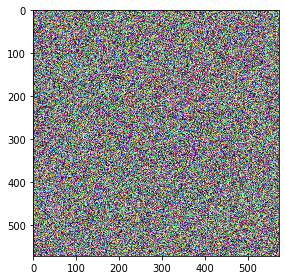

In [318]:
io.imshow(image[3].permute(1,2,0).numpy())

In [319]:
image[3].permute(1,2,0).shape

torch.Size([572, 572, 3])

In [380]:
a = np.random.random((3,10))
b = np.random.random((10,5))

In [385]:
c = np.dot(a,b)

In [386]:
c.shape

(3, 5)

In [397]:
d = np.exp(c)/np.sum(np.exp(c), axis=0)

In [401]:
from scipy.special import logsumexp

In [416]:
e = logsumexp(c, axis=0)

In [417]:
e

array([4.46854814, 4.31498205, 4.32542379, 3.24781363, 2.7768258 ])

In [436]:
x = torch.arange(-3,3,0.6).view(-1, 1)
x.size(0)

10

In [452]:
class mlp(nn.Module):
    def __init__(self, no_in, no_out):
        w = torch.rand([10, 1], requires_grad=True)
        b = torch.tensor([0.1], requires_grad=True)
        self.x = torch.arange(-3,3,0.6).view(-1,1)
        self.y = 5*self.x+3
        super(mlp, self).__init__()
    
    def forward(self):
        z = np.dot(w.detach().numpy(), b.detach().numpy())
        return z
    
        

In [455]:
from torch.utils.data import Dataset, DataLoader

In [550]:
class randomloader(Dataset):
    
    def __init__(self):
        w = torch.rand([10, 1], requires_grad=True)
        b = torch.tensor([0.1], requires_grad=True)
        x1 = torch.arange(-3,3,0.6)
        x2 = torch.arange(-3,3,0.6)
        self.x = torch.cat([x1, x2], 0).view(10, 2)
        #self.x = torch.arange(-3,3,0.6).view(-1,1)
        self.y = 5*self.x+3
        self.len = self.x.size(0)
        super(randomloader, self).__init__()
        
    def __len__(self):
        return self.len
    
    def __getitem__(self, item):
        return self.x[item], self.y[item]


In [551]:
class linear(nn.Module):
    def __init__(self, no_in, no_out):
        super(linear, self).__init__()
        self.nn = nn.Linear(no_in, no_out)
    
    def forward(self, x):
        x = self.nn(x)
        return x

In [552]:
a = randomloader()
from torch.optim import Adam
data = DataLoader(a, batch_size=1)
def criterion(yhat, y):
    return torch.mean((yhat-y)**2)


In [559]:
mod = linear(2, 1)
optim = Adam(list(mod.parameters()), lr=0.1)
epochs = 50
cost_list = []
for epoch in range(epochs):
    cost = 0
    for x,y in zip(data.dataset.x, data.dataset.y):
        optim.zero_grad()
        yhat = mod(x)
        loss = criterion(yhat, y)
        loss.backward()
        optim.step()
        cost+=loss.item()
    cost_list.append(loss)
        

In [807]:
convert_rand_val_to_label(torch.rand([15,2]))

tensor([0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0.])

In [737]:
from torch.functional import F
class logistic(nn.Module):
    def __init__(self, no_in, no_out):
        super(logistic, self).__init__()
        self.lin = nn.Linear(no_in, no_out)
    
    def forward(self, x):
        z = torch.sigmoid(self.lin(x))
        #z = F.softmax(2)
        #return 1 if z >=0 else 0
        return z.float()
        

In [804]:
def convert_rand_val_to_label(tensor):
    med = sum(np.median(tensor, axis=0))
    label_tens = torch.zeros(tensor.size(0))
    for idx, val in enumerate(tensor):
        score = val.numpy().sum(0)
        if score > med:
            lab = 1
            label_tens[idx] = lab
    return label_tens
    
    

In [808]:
class logdataset(Dataset):
    def __init__(self):
        super(logdataset, self).__init__()
        self.x = torch.rand([30, 2])
        #self.y = torch.randint(0, 2, [30]).float()
        self.y = logdataset.convert_rand_val_to_label(self.x)
        self.len = self.x.size(0)
        
    def __len__(self):
        return self.len
    
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    @staticmethod
    def convert_rand_val_to_label(tensor):
        med = sum(np.median(tensor, axis=0))
        label_tens = torch.zeros(tensor.size(0))
        for idx, val in enumerate(tensor):
            score = val.numpy().sum(0)
            if score > med:
                lab = 1
                label_tens[idx] = lab
        return label_tens
    
    


In [810]:
mod_log = logistic(2, 1)
criterion = nn.BCELoss()
dat = logdataset()
loader = DataLoader(dat, batch_size=1)
optim = Adam(list(mod_log.parameters()), lr=0.1)
epochs = 200
cost_list = []
for epoch in range(epochs):
    cost = 0
    acc_list = []
    for x, y in zip(loader.dataset.x, loader.dataset.y):
        optim.zero_grad()
        yhat = mod_log(x)
        y_guess = 1 if yhat >= 0 else 0
        #print(yhat.dtype)
        #print(y.dtype)
        loss = criterion(yhat, y)
        loss.backward()
        #print(yhat, y)
        acc_sample = (y_guess==y).sum().tolist()
        #print(y_guess, y)
        optim.step()
        cost+=loss.item()
        acc_list.append(acc_sample)
    cost_list.append(loss)
overall_acc = sum(acc_list)/len(acc_list)*100
print(f'{overall_acc}%')
        

40.0%
